# 🧠 Convolutional Neural Network 실습 (TensorFlow/Keras + MNIST)

이 노트북에서는 Convolution과 Pooling의 개념을 실습합니다.

## 주요 포인트
- Convolution: kernel size, padding, stride, dilation, filter 개수, bias
- Pooling: MaxPooling vs AveragePooling


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.20.0


## [1] MNIST 데이터 로드 및 전처리

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


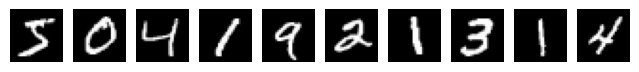

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()

## [2] Convolution 실습
### 2.1 Kernel size & Padding

In [3]:
sample = x_train[0:1]

conv_valid = layers.Conv2D(filters=1, kernel_size=(3,3), padding='valid', use_bias=False)
conv_same = layers.Conv2D(filters=1, kernel_size=(3,3), padding='same', use_bias=False)

out_valid = conv_valid(sample)
out_same = conv_same(sample)

print('입력:', sample.shape)
print('valid 출력:', out_valid.shape)
print('same 출력:', out_same.shape)

입력: (1, 28, 28, 1)
valid 출력: (1, 26, 26, 1)
same 출력: (1, 28, 28, 1)


### 2.2 Stride와 Dilation

In [4]:
conv_stride = layers.Conv2D(1, (3,3), strides=(2,2), padding='same', use_bias=False)
conv_dilated = layers.Conv2D(1, (3,3), dilation_rate=(2,2), padding='same', use_bias=False)

out_stride = conv_stride(sample)
out_dilated = conv_dilated(sample)

print('stride=2 출력:', out_stride.shape)
print('dilation=2 출력:', out_dilated.shape)

stride=2 출력: (1, 14, 14, 1)
dilation=2 출력: (1, 28, 28, 1)


### 2.3 Filter 개수

출력 shape: (1, 28, 28, 8)


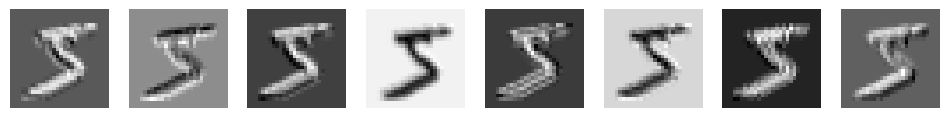

In [5]:
conv_multi = layers.Conv2D(8, (3,3), padding='same', use_bias=False)
out_multi = conv_multi(sample)
print('출력 shape:', out_multi.shape)

fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(out_multi[0, :, :, i], cmap='gray')
    axes[i].axis('off')
plt.show()

### 2.4 Bias 항 이해

In [6]:
conv_no_bias = layers.Conv2D(1, (3,3), padding='same', use_bias=False)
conv_with_bias = layers.Conv2D(1, (3,3), padding='same', use_bias=True)

out_no_bias = conv_no_bias(sample)
out_with_bias = conv_with_bias(sample)

bias_value = conv_with_bias.bias.numpy()
print('Bias 값:', bias_value)
print('Bias 적용 전후 차이:', tf.reduce_mean(out_with_bias - out_no_bias).numpy())

Bias 값: [0.]
Bias 적용 전후 차이: 0.15348361


## [3] Pooling 실습

입력: (1, 28, 28, 1)
Max Pool 출력: (1, 14, 14, 1)
Avg Pool 출력: (1, 14, 14, 1)


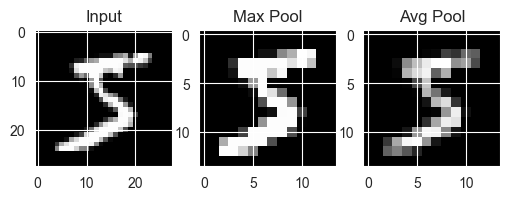

In [10]:
pool_max = layers.MaxPooling2D(pool_size=(2,2), strides=2)
pool_avg = layers.AveragePooling2D(pool_size=(2,2), strides=2)

out_max = pool_max(sample)
out_avg = pool_avg(sample)

print('입력:', sample.shape)
print('Max Pool 출력:', out_max.shape)
print('Avg Pool 출력:', out_avg.shape)

plt.figure(figsize=(6,2))
plt.subplot(1,3,1)
plt.title('Input')
plt.imshow(sample[0].squeeze(), cmap='gray')

plt.subplot(1,3,2)
plt.title('Max Pool')
plt.imshow(out_max[0], cmap='gray')

plt.subplot(1,3,3)
plt.title('Avg Pool')
plt.imshow(out_avg[0], cmap='gray')
plt.show()

## [4] CNN 간단 학습 실습

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.AveragePooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\kimyo\anaconda3\envs\PR\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9141 - loss: 0.2967 - val_accuracy: 0.9772 - val_loss: 0.0842
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9756 - loss: 0.0798 - val_accuracy: 0.9837 - val_loss: 0.0605
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9870 - val_loss: 0.0491
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0464
테스트 정확도: 0.9861999750137329
